In [1]:
import numpy as np
np.random.seed(22521259)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

In [2]:
def generate_data(n):
    x = np.random.rand(n)
    theta = np.random.normal(0,0.03,n)
    y = np.sin(1+x**2) + theta
    return x,y
N = 10
D1_train = generate_data(N)
D1_test = generate_data(N)

D2_train = generate_data(N)
D2_test = generate_data(N)

D3_train = generate_data(N)
D3_test = generate_data(N)

In [3]:
def plot_polynomial_regression(x_train, y_train, degree, ax, label):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(x_train.reshape(-1, 1), y_train)
    x_plot = np.linspace(0, 1, 100)
    y_plot = model.predict(x_plot.reshape(-1, 1))
    if label == 'D1':
        y_target = target_function(x_plot)
        ax.plot(x_plot, y_target, label='Target Function', color='black')
    ax.set_ylim(0.7,1.1)
    ax.plot(x_plot, y_plot, label=label)
    ax.set_title(f'Degree {degree} polynomials')
    ax.legend()

In [4]:
def target_function(x):
    return np.sin(1+x**2)

In [5]:
def calculate_errors(x_train, y_train, x_test, y_test, degree):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(x_train.reshape(-1, 1), y_train)
    y_train_pred = model.predict(x_train.reshape(-1, 1))
    y_test_pred = model.predict(x_test.reshape(-1, 1))
    e_in = mean_squared_error(y_train, y_train_pred)
    e_out = mean_squared_error(y_test, y_test_pred)
    return e_in, e_out

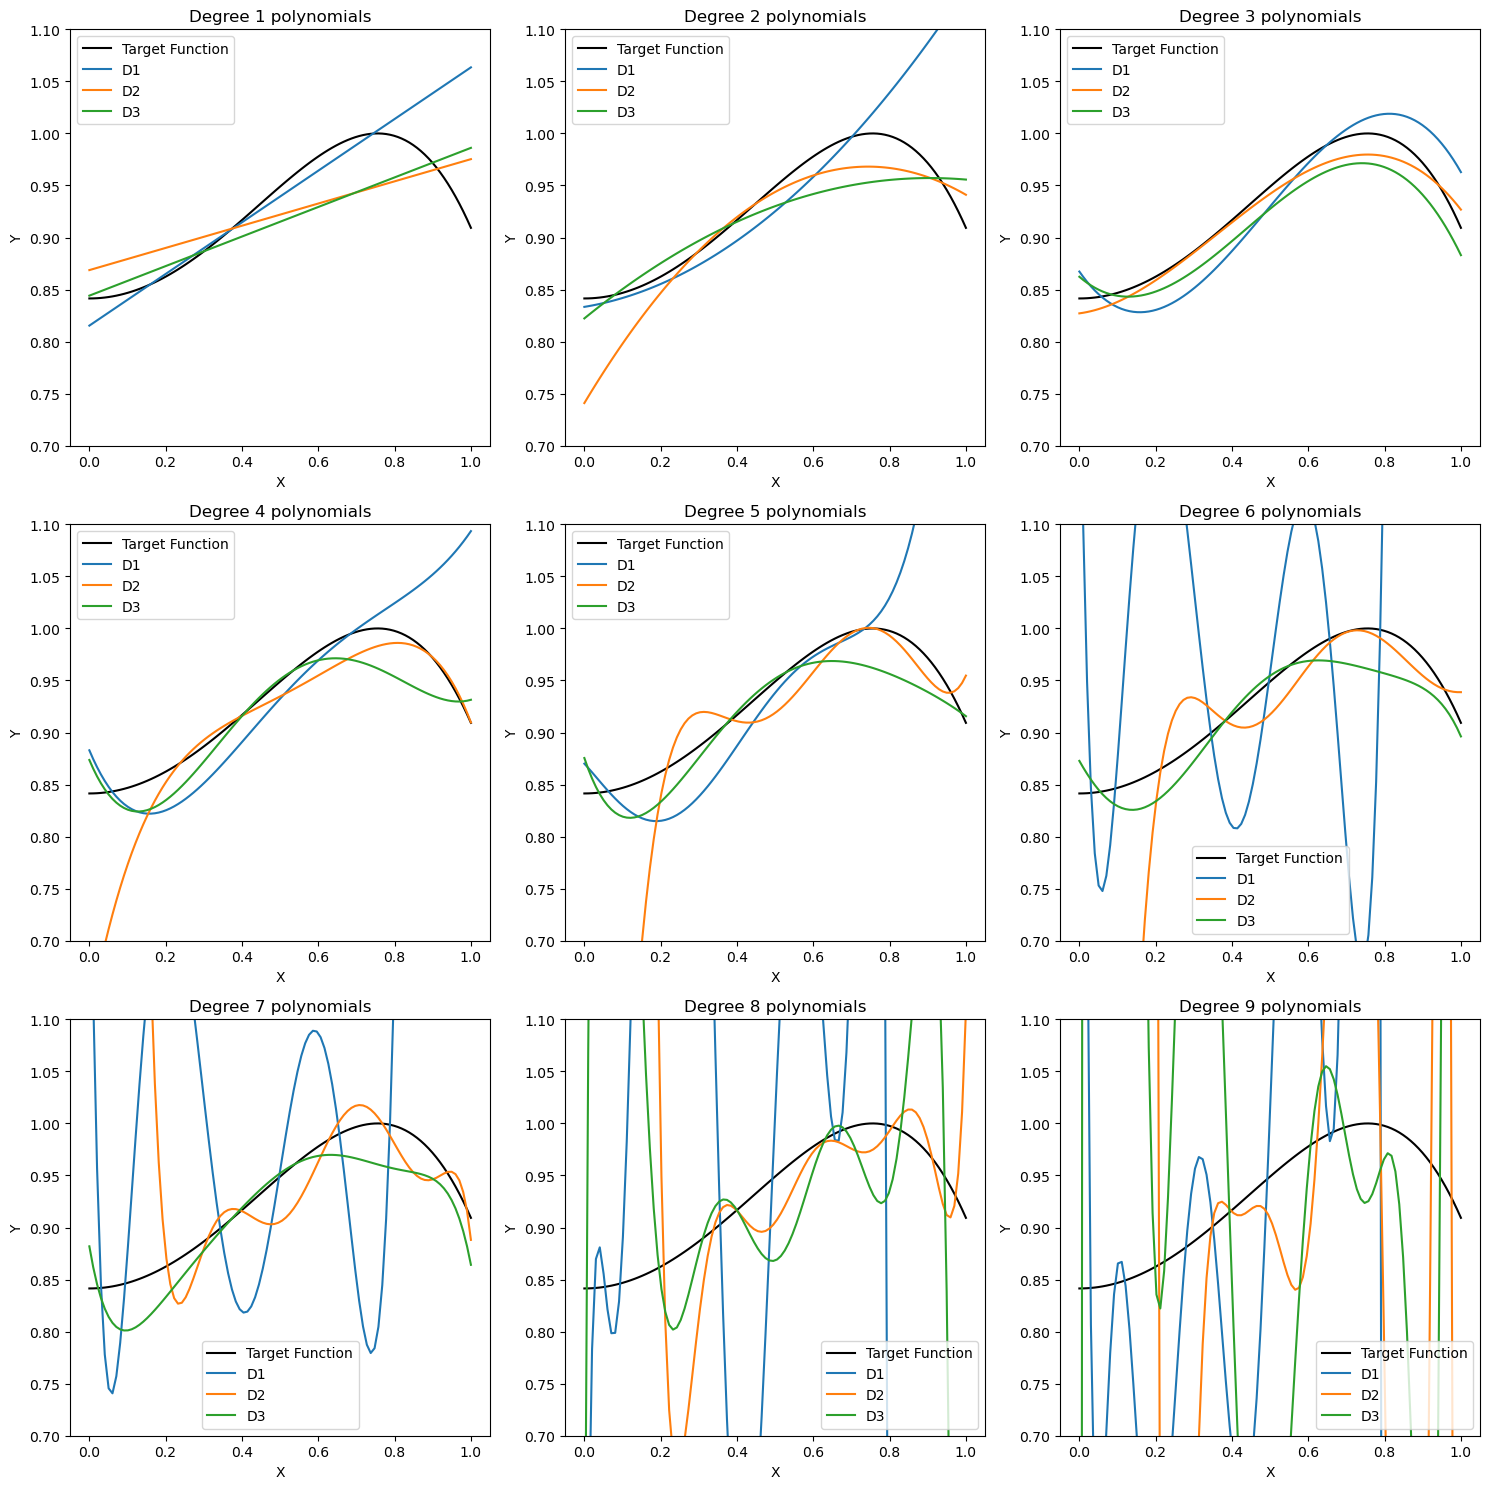

In [6]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
for degree, ax in zip(range(1, 10), axs.flatten()):
    plot_polynomial_regression(D1_train[0], D1_train[1], degree, ax, 'D1')
for degree, ax in zip(range(1, 10), axs.flatten()):
    plot_polynomial_regression(D2_train[0], D2_train[1], degree, ax, 'D2')
for degree, ax in zip(range(1, 10), axs.flatten()):
    plot_polynomial_regression(D3_train[0], D3_train[1], degree, ax, 'D3')
for ax in axs.flat:
    ax.set(xlabel='X', ylabel='Y')
    ax.legend()
plt.tight_layout()
plt.show()

In [7]:
result = pd.DataFrame(columns=['Degree', 'E_in', 'E_out'])

for degree in range(1, 10):
    e_in, e_out = calculate_errors(D1_train[0], D1_train[1], D1_test[0], D1_test[1], degree)
    result = pd.concat([result, pd.DataFrame([[degree, e_in, e_out]], columns=['Degree', 'E_in', 'E_out'])], ignore_index=True)

print(result.to_markdown(index=False))

|   Degree |        E_in |         E_out |
|---------:|------------:|--------------:|
|        1 | 0.000572156 |    0.00143146 |
|        2 | 0.000423771 |    0.00281052 |
|        3 | 0.000292522 |    0.00107589 |
|        4 | 0.000275968 |    0.00171242 |
|        5 | 0.000260641 |    0.00488111 |
|        6 | 6.65011e-05 |    5.24093    |
|        7 | 6.37052e-05 |    1.92298    |
|        8 | 7.25866e-06 |  403.252      |
|        9 | 8.8319e-21  | 4661.23       |


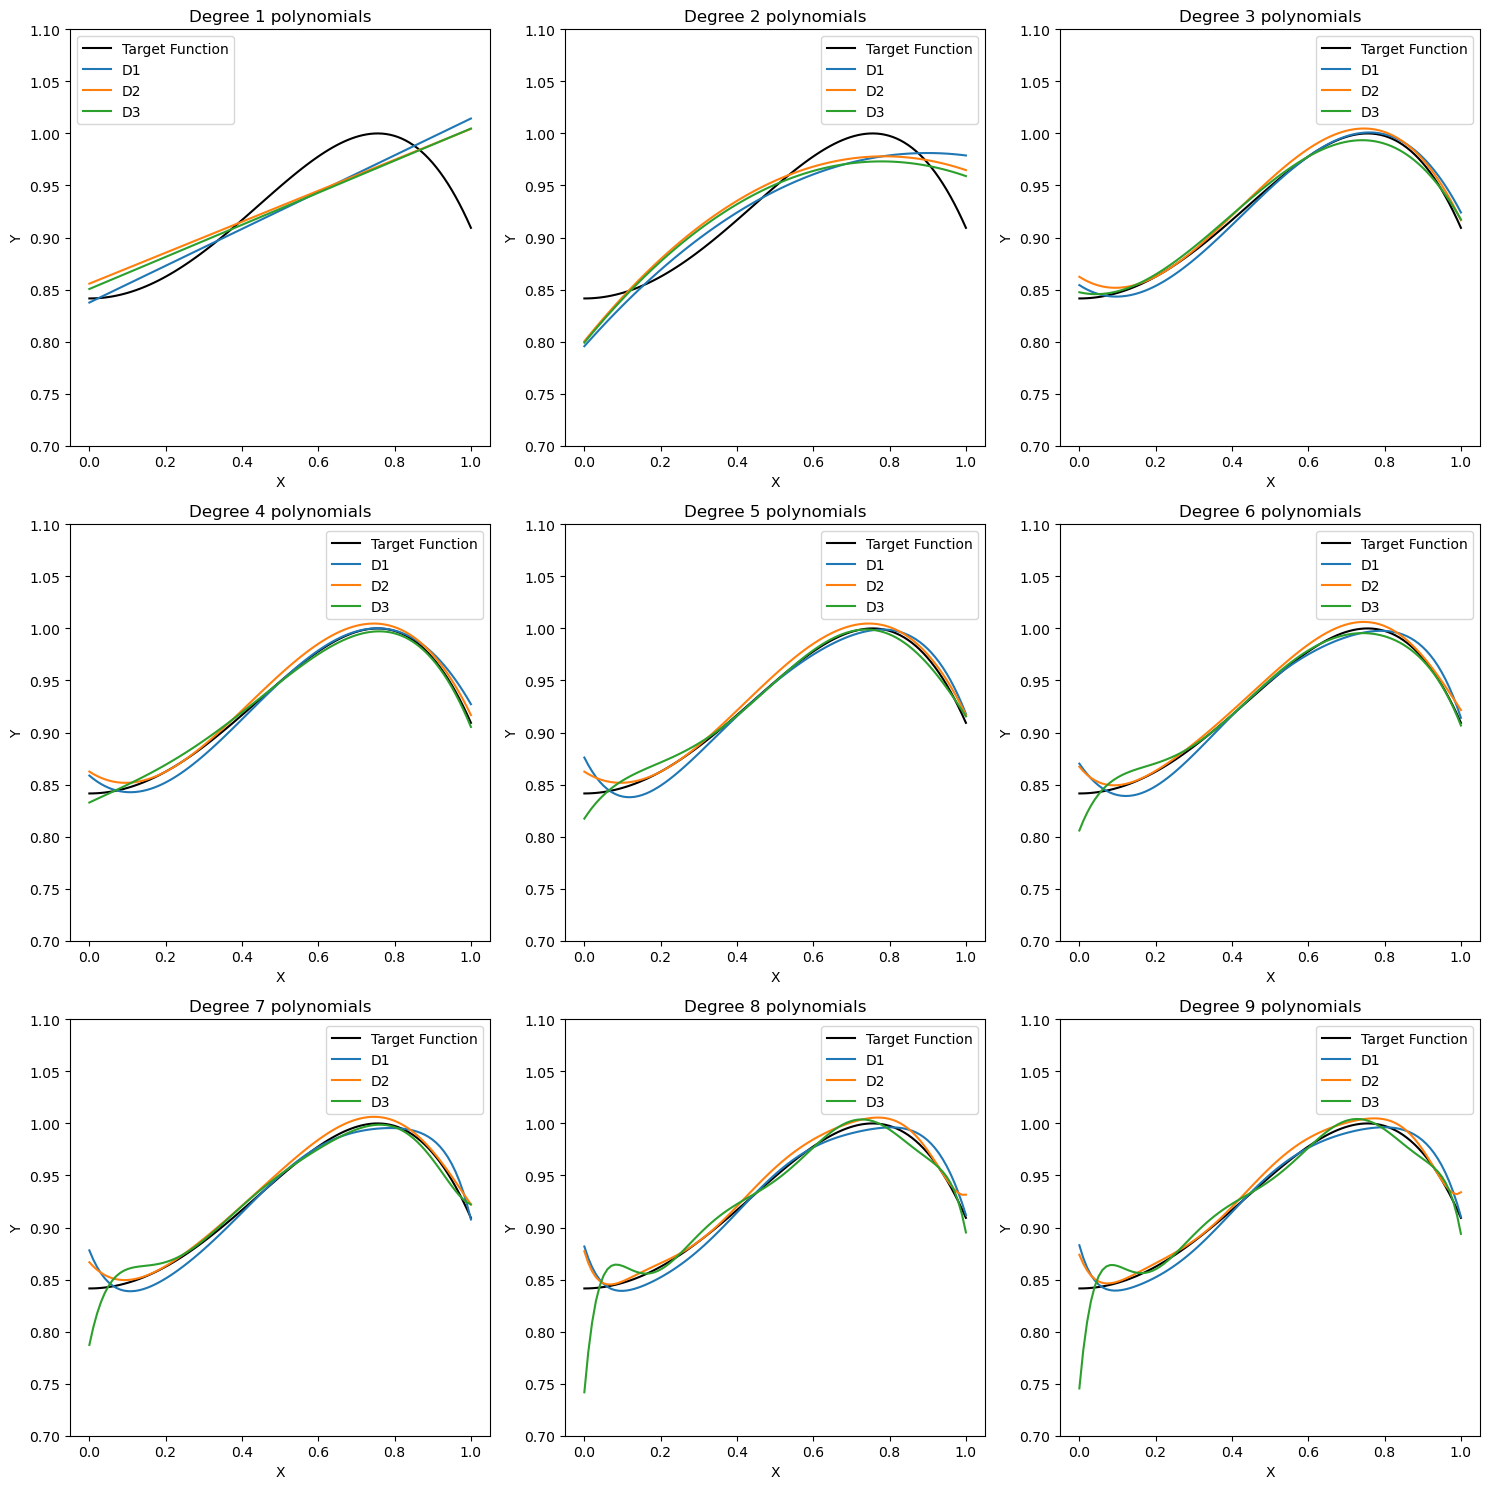

In [8]:
N = 100
D1_train = generate_data(N)
D1_test = generate_data(N)

D2_train = generate_data(N)
D2_test = generate_data(N)

D3_train = generate_data(N)
D3_test = generate_data(N)
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
for degree, ax in zip(range(1, 10), axs.flatten()):
    plot_polynomial_regression(D1_train[0], D1_train[1], degree, ax, 'D1')
for degree, ax in zip(range(1, 10), axs.flatten()):
    plot_polynomial_regression(D2_train[0], D2_train[1], degree, ax, 'D2')
for degree, ax in zip(range(1, 10), axs.flatten()):
    plot_polynomial_regression(D3_train[0], D3_train[1], degree, ax, 'D3')
for ax in axs.flat:
    ax.set(xlabel='X', ylabel='Y')
    ax.legend()
plt.tight_layout()
plt.show()

In [9]:
result = pd.DataFrame(columns=['Degree', 'E_in', 'E_out'])

for degree in range(1, 10):
    e_in, e_out = calculate_errors(D1_train[0], D1_train[1], D1_test[0], D1_test[1], degree)
    result = pd.concat([result, pd.DataFrame([[degree, e_in, e_out]], columns=['Degree', 'E_in', 'E_out'])], ignore_index=True)

print(result.to_markdown(index=False))

|   Degree |        E_in |      E_out |
|---------:|------------:|-----------:|
|        1 | 0.00159019  | 0.00170058 |
|        2 | 0.00132051  | 0.00152905 |
|        3 | 0.000934686 | 0.00108869 |
|        4 | 0.000933479 | 0.0010912  |
|        5 | 0.000921822 | 0.00110516 |
|        6 | 0.000920407 | 0.00110963 |
|        7 | 0.000917316 | 0.00112551 |
|        8 | 0.000916403 | 0.00112463 |
|        9 | 0.000916302 | 0.00112811 |


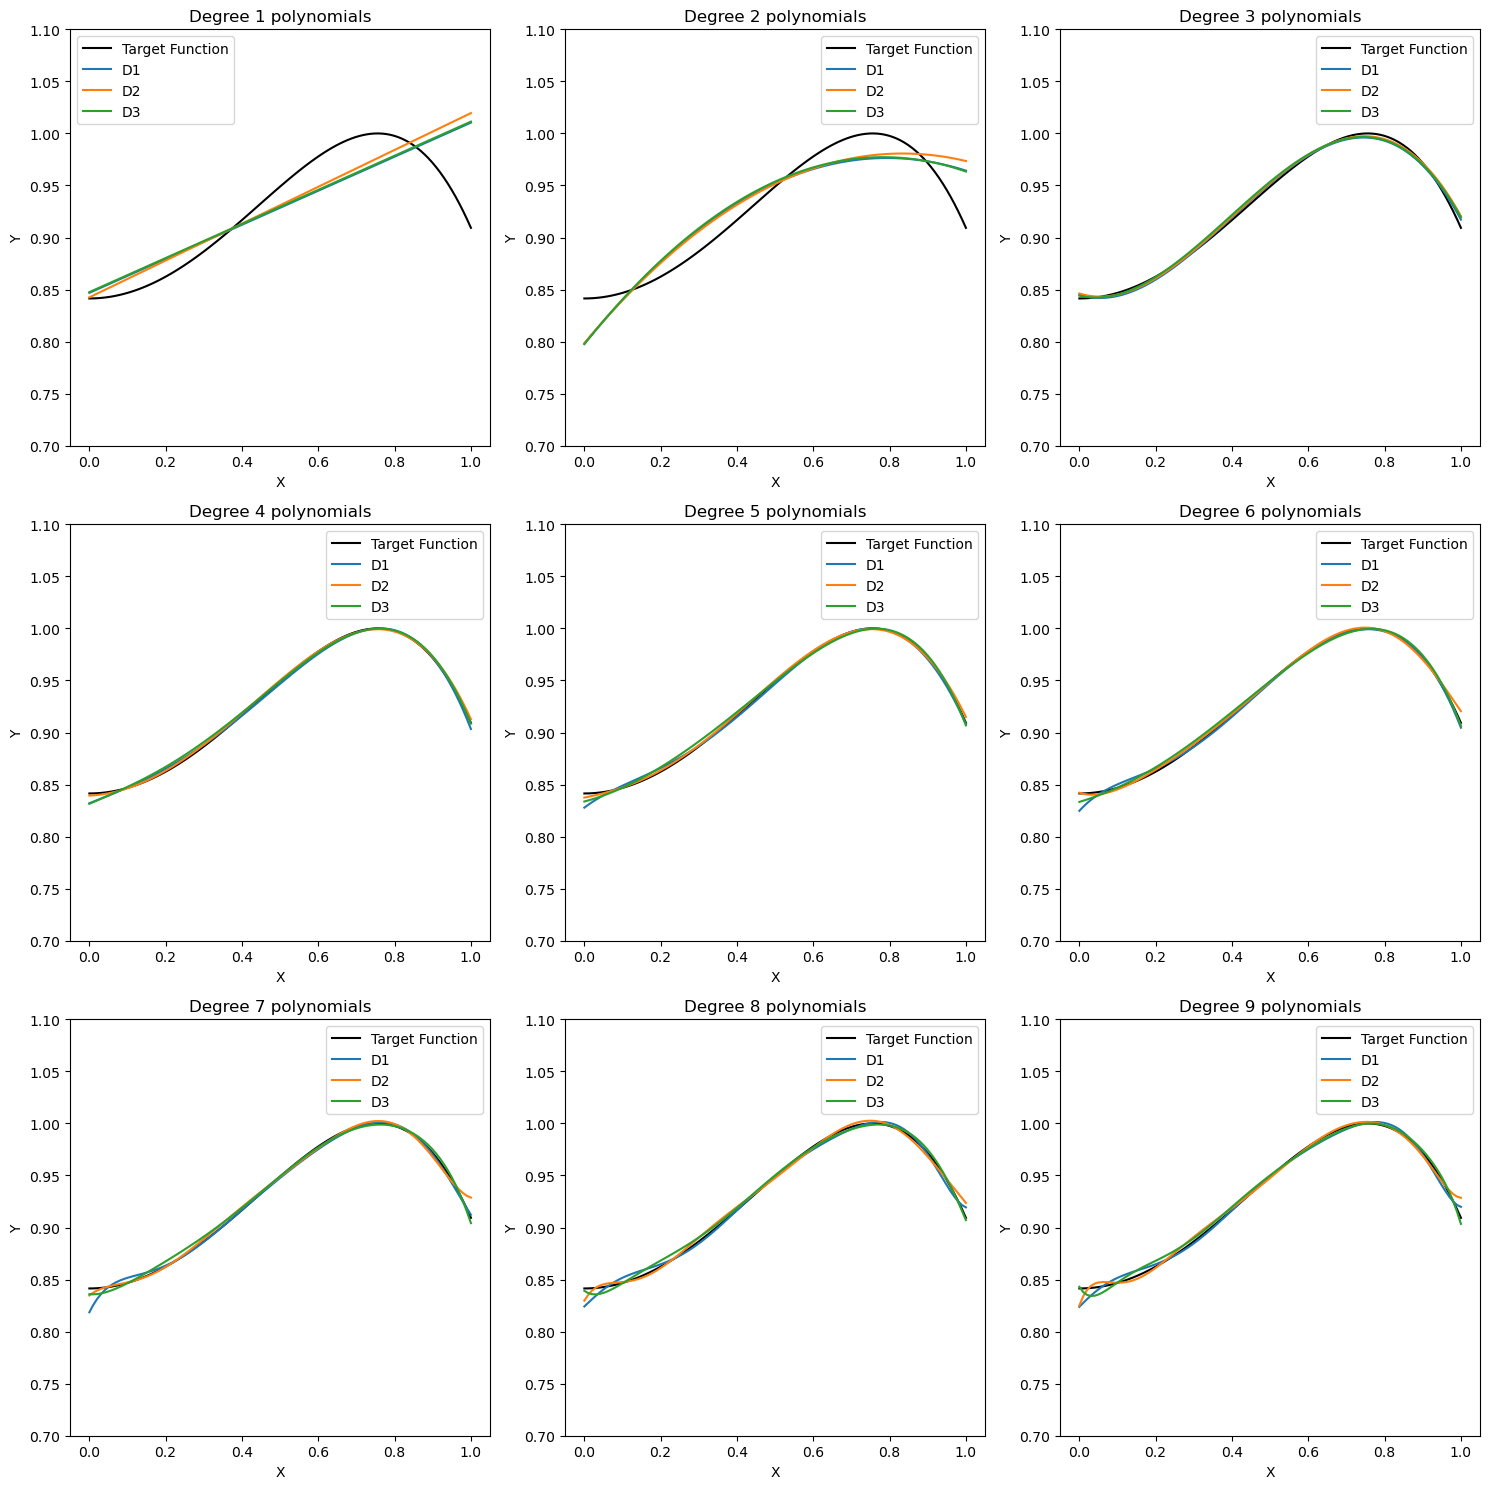

In [10]:
N = 1000
D1_train = generate_data(N)
D1_test = generate_data(N)

D2_train = generate_data(N)
D2_test = generate_data(N)

D3_train = generate_data(N)
D3_test = generate_data(N)
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
for degree, ax in zip(range(1, 10), axs.flatten()):
    plot_polynomial_regression(D1_train[0], D1_train[1], degree, ax, 'D1')
for degree, ax in zip(range(1, 10), axs.flatten()):
    plot_polynomial_regression(D2_train[0], D2_train[1], degree, ax, 'D2')
for degree, ax in zip(range(1, 10), axs.flatten()):
    plot_polynomial_regression(D3_train[0], D3_train[1], degree, ax, 'D3')
for ax in axs.flat:
    ax.set(xlabel='X', ylabel='Y')
    ax.legend()
plt.tight_layout()
plt.show()

In [11]:
result = pd.DataFrame(columns=['Degree', 'E_in', 'E_out'])

for degree in range(1, 10):
    e_in, e_out = calculate_errors(D1_train[0], D1_train[1], D1_test[0], D1_test[1], degree)
    result = pd.concat([result, pd.DataFrame([[degree, e_in, e_out]], columns=['Degree', 'E_in', 'E_out'])], ignore_index=True)

print(result.to_markdown(index=False))

|   Degree |        E_in |       E_out |
|---------:|------------:|------------:|
|        1 | 0.00164318  | 0.00172937  |
|        2 | 0.0011978   | 0.00129894  |
|        3 | 0.000888816 | 0.000949186 |
|        4 | 0.000870581 | 0.000930622 |
|        5 | 0.000869028 | 0.000931234 |
|        6 | 0.000868334 | 0.000931127 |
|        7 | 0.000865753 | 0.000936311 |
|        8 | 0.000863901 | 0.00093437  |
|        9 | 0.000863894 | 0.000934376 |


In [12]:
#Khi tăng độ phức tạp của mô hình thì bias giảm bởi vì bias là sai số của mô hình so với dữ liệu,
#càng tăng độ phức tạp của mô hình thì mô hình sẽ càng fit với dữ liệu(và dẫn tới overfit)

#Khi tăng độ phức tạp của mô hình thì variance tăng bởi vì variance thể hiện mức độ biến động của mô hình đối với data khác nhau,
#càng tăng độ phức tạp của mô hình thì mô hình mô hình sẽ càng bị nhạy cảm với các data

#Khi tăng kích thước tập train, bias giảm bởi vì mô hình có thêm thông tin để mô tả mối quan hệ giữa đặc trưng và đầu ra,
#sai số giảm => bias giảm

#Khi tăng kích thước tập train variance giảm bởi vì mô hình ít nhạy cảm hơn với biến động nhỏ trong data